In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

from sdlbfgs import *
from helper import *

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [4]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [5]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


64 images in each batch and each image has a dimension of 28 x 28 pixels


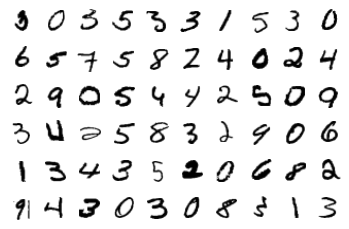

In [6]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the neural network.

### Model A: FCNN
Fully connected neural network, with hidden layer structure through vector *hidden_sizes*.

In [7]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
modelA=fully_connected_NN(sizes)
print(modelA)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Model B: CNN
Convolutional neural network composed of two convolutional layers and two fully connected layers.

In [ ]:
# The size of the images is computed.
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
# Depending on the size of the image, a CNN model is built.
modelB=ConvNet(image_size)
print(modelB)

## SdLBFGS

### Fully connected network

In [9]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
model=fully_connected_NN(sizes)
# Loss of the model is defined.
criterion = nn.NLLLoss()

method = "SdLBFGS"
optimizer = SdLBFGS(model.parameters())

epochs = 30
train_losses_fcnn, test_losses_fcnn, train_accuracy_fcnn, test_accuracy_fcnn, training_time_fcnn = optimize(optimizer, epochs, trainloader, valloader, model, criterion , method )


Epoch 0


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Training loss: 0.31607011229848303
Number Of Images Tested = 10000
Model Accuracy = 0.9377
Number Of Images Tested = 60000
Model Accuracy = 0.9391166666666667
Test loss: 0.20666327285965916 

Epoch 1
Training loss: 0.18689704414155248
Number Of Images Tested = 10000
Model Accuracy = 0.9491
Number Of Images Tested = 60000
Model Accuracy = 0.9530333333333333
Test loss: 0.17010210038038195 

Epoch 2
Training loss: 0.16468868326487096
Number Of Images Tested = 10000
Model Accuracy = 0.9525
Number Of Images Tested = 60000
Model Accuracy = 0.9558333333333333
Test loss: 0.16355203343614652 

Epoch 3
Training loss: 0.15544213183414834
Number Of Images Tested = 10000
Model Accuracy = 0.954
Number Of Images Tested = 60000
Model Accuracy = 0.9560833333333333
Test loss: 0.15820328065544176 

Epoch 4
Training loss: 0.14473956363595356
Number Of Images Tested = 10000
Model Accuracy = 0.9567
Number Of Images Tested = 60000
Model Accuracy = 0.9595
Test loss: 0.14944426139081074 

Epoch 5
Training loss

In [ ]:
np.savetxt('/content/drive/My Drive/marghe/dLBFGS_fcNN_trainloss.txt', train_losses_fcnn)
np.savetxt('drive/SdLBFGS_fcNN_testloss.txt', test_losses_fcnn)
np.savetxt('drive/SdLBFGS_fcNN_trainacc.txt', train_accuracy_fcnn)
np.savetxt('drive/SdLBFGS_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('drive/SdLBFGS_fcNN_times.txt',training_time_fcnn)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


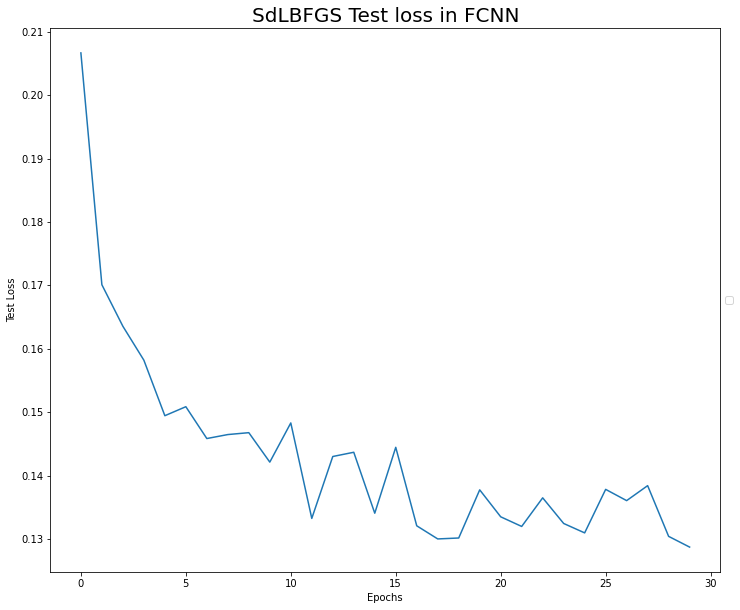

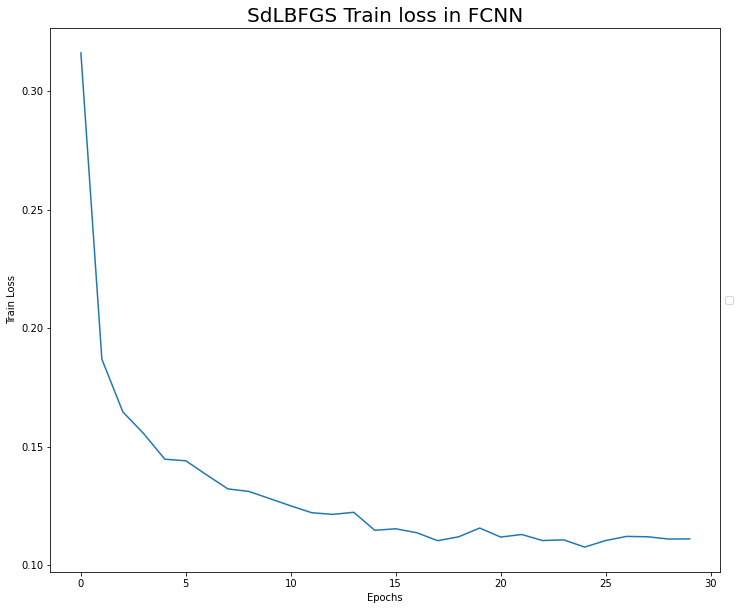

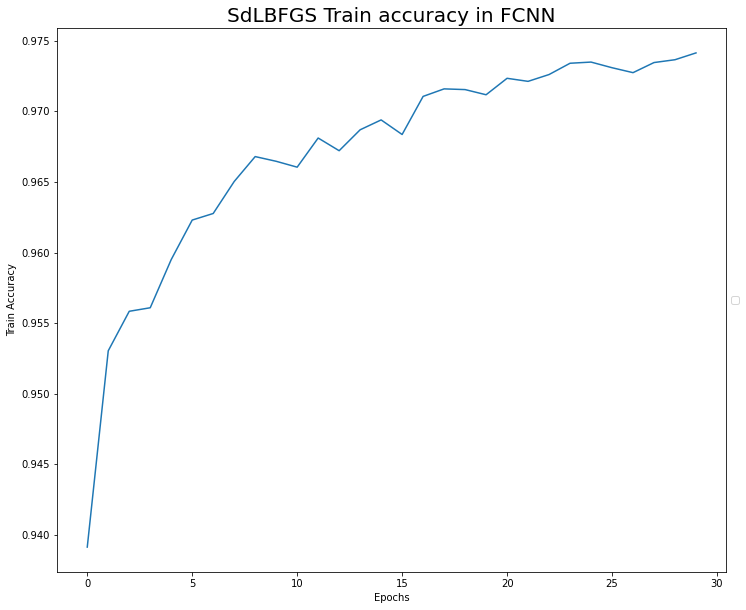

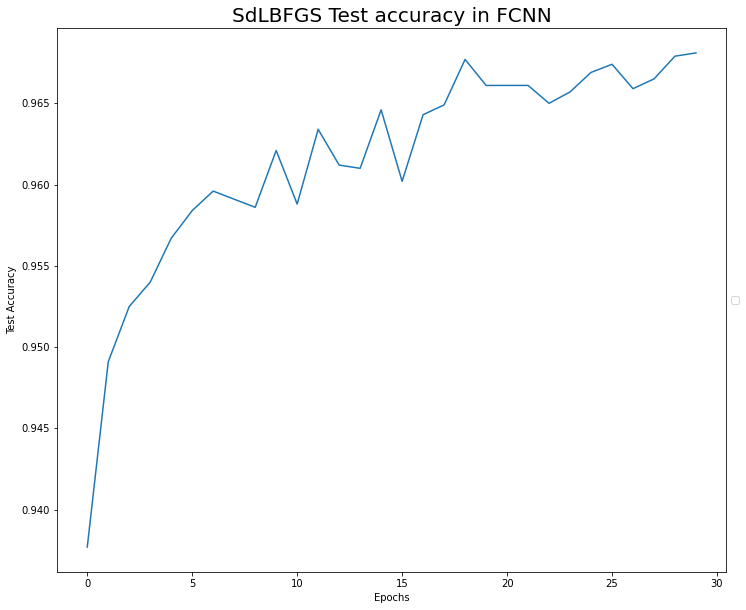

In [11]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SdLBFGS Test loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_loss_fcnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SdLBFGS Train loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_loss_fcnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_accuracy_fcnn.jpg")


No handles with labels found to put in legend.
No handles with labels found to put in legend.


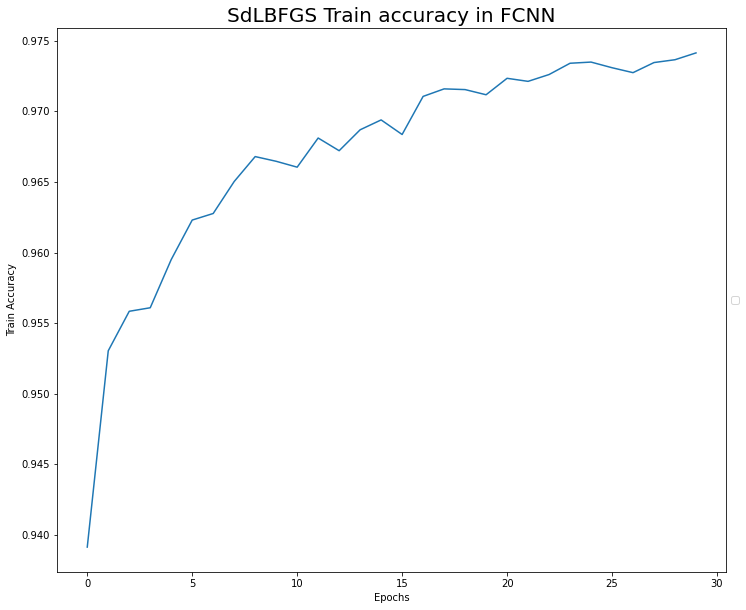

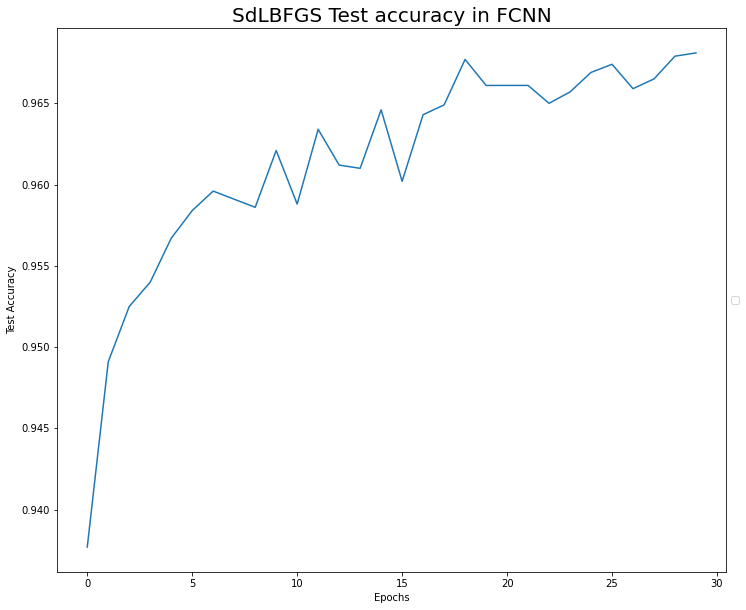

In [20]:

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_accuracy_fcnn.jpg")

### CNN

In [31]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# Model building
# The size of the images is computed.
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
modelB=ConvNet(image_size)


method = "SdLBFGS"
optimizer = SdLBFGS(modelB.parameters(), history_size = 50)

epochs = 30

train_losses_cnn, test_losses_cnn, train_accuracy_cnn, test_accuracy_cnn, training_time_cnn = optimize_CNN(optimizer, epochs, trainloader, valloader, modelB, criterion , method )



Epoch 0
Training loss: 0.2208711963364366
Number Of Images Tested = 10000
Model Accuracy = 0.9791
Number Of Images Tested = 60000
Model Accuracy = 0.9763
Test loss: 0.07093267313428639 

Epoch 1
Training loss: 0.10418237944344125
Number Of Images Tested = 10000
Model Accuracy = 0.9794
Number Of Images Tested = 60000
Model Accuracy = 0.9779166666666667
Test loss: 0.10091066088914735 

Epoch 2
Training loss: 0.1381782318598608
Number Of Images Tested = 10000
Model Accuracy = 0.98
Number Of Images Tested = 60000
Model Accuracy = 0.9764166666666667
Test loss: 0.12238364134559068 

Epoch 3
Training loss: 0.14396893069030897
Number Of Images Tested = 10000
Model Accuracy = 0.9807
Number Of Images Tested = 60000
Model Accuracy = 0.9776
Test loss: 0.1197102794278968 

Epoch 4
Training loss: 0.14479012178041203
Number Of Images Tested = 10000
Model Accuracy = 0.9815
Number Of Images Tested = 60000
Model Accuracy = 0.9788666666666667
Test loss: 0.12764393289523163 

Epoch 5
Training loss: 0.1554

In [0]:
np.savetxt('/content/drive/My Drive/marghe/SdLBFGS_CNN_trainloss.txt', train_losses_cnn)
np.savetxt('/content/drive/My Drive/marghe/SdLBFGS_CNN_testloss.txt', test_losses_cnn)
np.savetxt('/content/drive/My Drive/marghe/SdLBFGS_CNN_trainacc.txt', train_accuracy_cnn)
np.savetxt('/content/drive/My Drive/marghe/SdLBFGS_CNN_testacc.txt', test_accuracy_cnn)


In [33]:
training_time_cnn


458.9329687039057

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


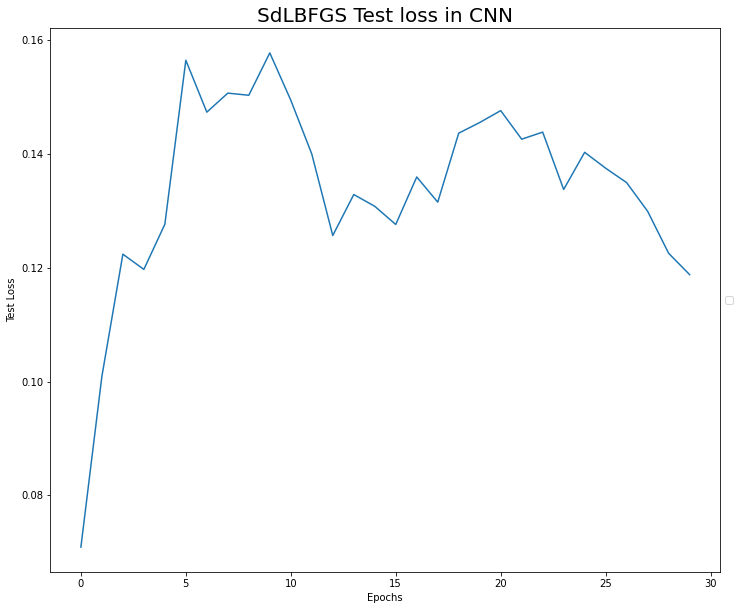

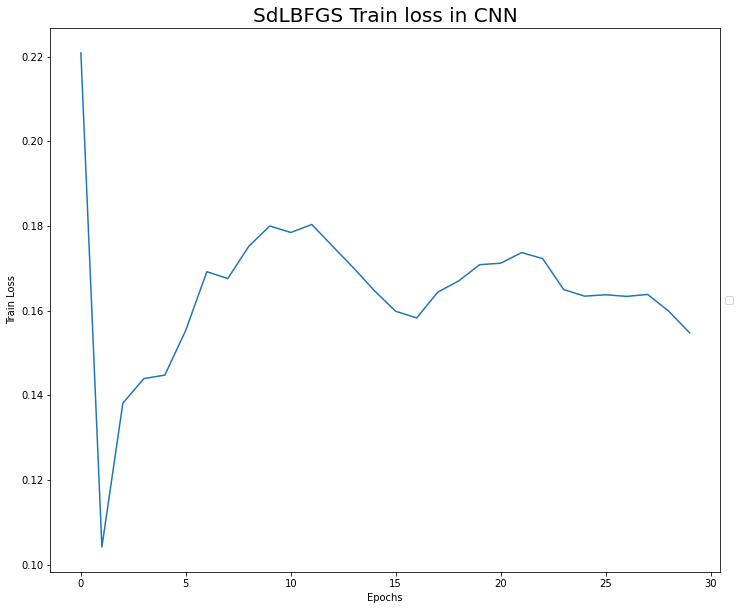

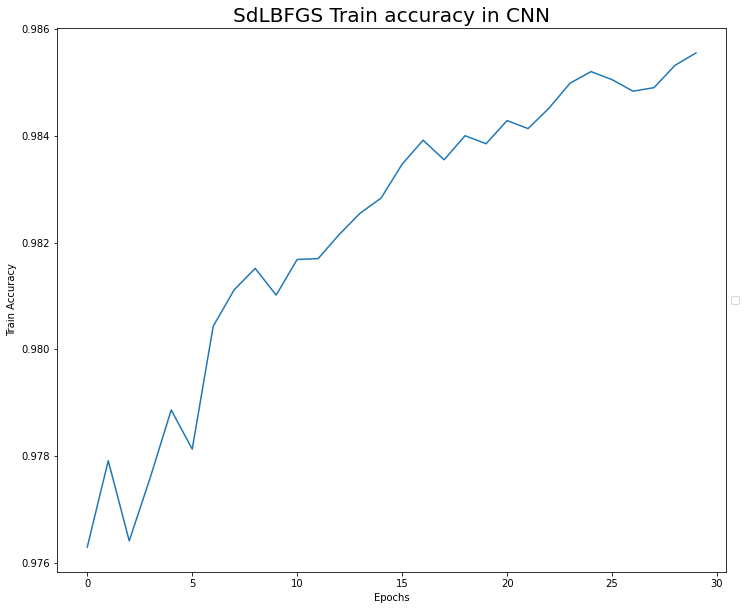

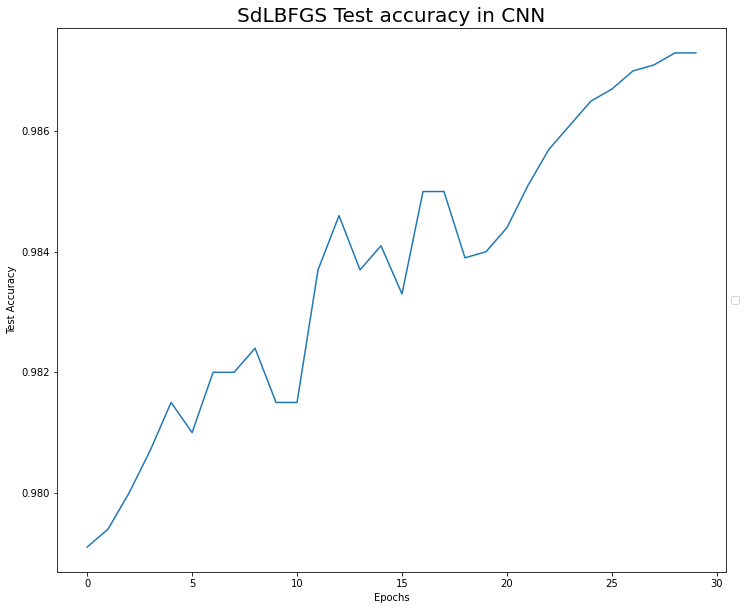

In [34]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SdLBFGS Test loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/content/drive/My Drive/marghe/SdLBFGS_test_loss_cnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SdLBFGS Train loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/content/drive/My Drive/marghe/SdLBFGS_train_loss_cnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/content/drive/My Drive/marghe/SdLBFGS_train_accuracy_cnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/content/drive/My Drive/marghe/SdLBFGS_test_accuracy_cnn.jpg")